In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('data/train.csv')

def convert_values(value):
    if isinstance(value, str) and 'Hund+' in value:
        return int(value.replace('Hund+', '')) * 100
    elif isinstance(value, str) and 'Thou+' in value:
        return int(value.replace('Thou+', '')) * 1000
    elif isinstance(value, str) and 'Lac+' in value:
        return int(value.replace('Lac+', '')) * 100000
    elif isinstance(value, str) and 'Crore+' in value:
        return int(value.replace('Crore+', '')) * 1000000
    else:
        return int(value)
    
data['Total Assets'] = data['Total Assets'].apply(convert_values)
data['Liabilities'] = data['Liabilities'].apply(convert_values)


In [32]:
parties = data['Party'].unique()
print(parties)

['DMK' 'BJP' 'INC' 'AITC' 'AAP' 'SP' 'NPP' 'BJD' 'IND' 'SHS' 'RJD' 'YSRCP'
 'AIADMK' 'CPI(M)' 'NCP' 'TDP' 'NDPP' 'CPI' 'Sikkim Krantikari Morcha'
 'JD(U)' 'JMM' 'JD(S)' 'Tipra Motha Party']


# Criminal Cases more then 5

In [33]:
# Filter the data where criminal cases are more than 5
crime_df = data[data['Criminal Case'] > 5]

crime_parties = crime_df['Party'].values
crime_cases = crime_df['Criminal Case'].values

print(crime_parties)
print(crime_cases)

['BJP' 'INC' 'INC' 'DMK' 'BJP' 'CPI(M)' 'BJP' 'INC' 'INC' 'BJP' 'DMK' 'SP'
 'IND' 'IND' 'SP' 'BJP' 'DMK' 'BJP' 'NCP' 'SP' 'YSRCP' 'CPI(M)' 'INC'
 'BJP' 'SHS' 'DMK' 'INC' 'DMK' 'BJP' 'BJP' 'DMK' 'IND' 'INC' 'INC' 'INC'
 'DMK' 'BJP' 'DMK' 'YSRCP' 'AITC' 'CPI(M)' 'BJP' 'BJP' 'BJP' 'DMK' 'INC'
 'DMK' 'RJD' 'DMK' 'DMK' 'BJP' 'SP' 'BJP' 'SP' 'AITC' 'INC' 'DMK' 'INC'
 'BJP' 'INC' 'INC' 'DMK' 'DMK' 'DMK' 'INC' 'DMK' 'BJD' 'JMM' 'DMK' 'INC'
 'BJP' 'INC' 'BJD' 'CPI(M)' 'BJP' 'RJD' 'AAP' 'YSRCP' 'BJP' 'BJP' 'SHS'
 'DMK' 'BJP' 'SP' 'IND' 'INC' 'AITC' 'DMK' 'RJD' 'JD(U)' 'BJP' 'DMK' 'BJD'
 'SP' 'INC' 'BJP' 'BJP' 'INC' 'DMK' 'BJP' 'INC' 'DMK' 'DMK' 'SP' 'INC'
 'BJD' 'SHS' 'DMK' 'JD(U)' 'AITC' 'DMK' 'CPI(M)' 'SP' 'INC' 'INC' 'INC'
 'BJP' 'INC' 'DMK' 'RJD' 'RJD' 'SP' 'BJP' 'DMK' 'AITC' 'DMK' 'BJP' 'SP'
 'INC' 'YSRCP' 'JD(U)' 'DMK' 'INC' 'AITC' 'INC' 'BJP' 'AITC' 'DMK'
 'CPI(M)' 'INC' 'BJD' 'YSRCP' 'INC' 'BJP' 'BJP' 'BJP' 'YSRCP' 'YSRCP'
 'JD(S)' 'INC' 'BJP' 'INC' 'DMK' 'BJP' 'CPI(M)' 'NCP' 'INC' 'YSRC

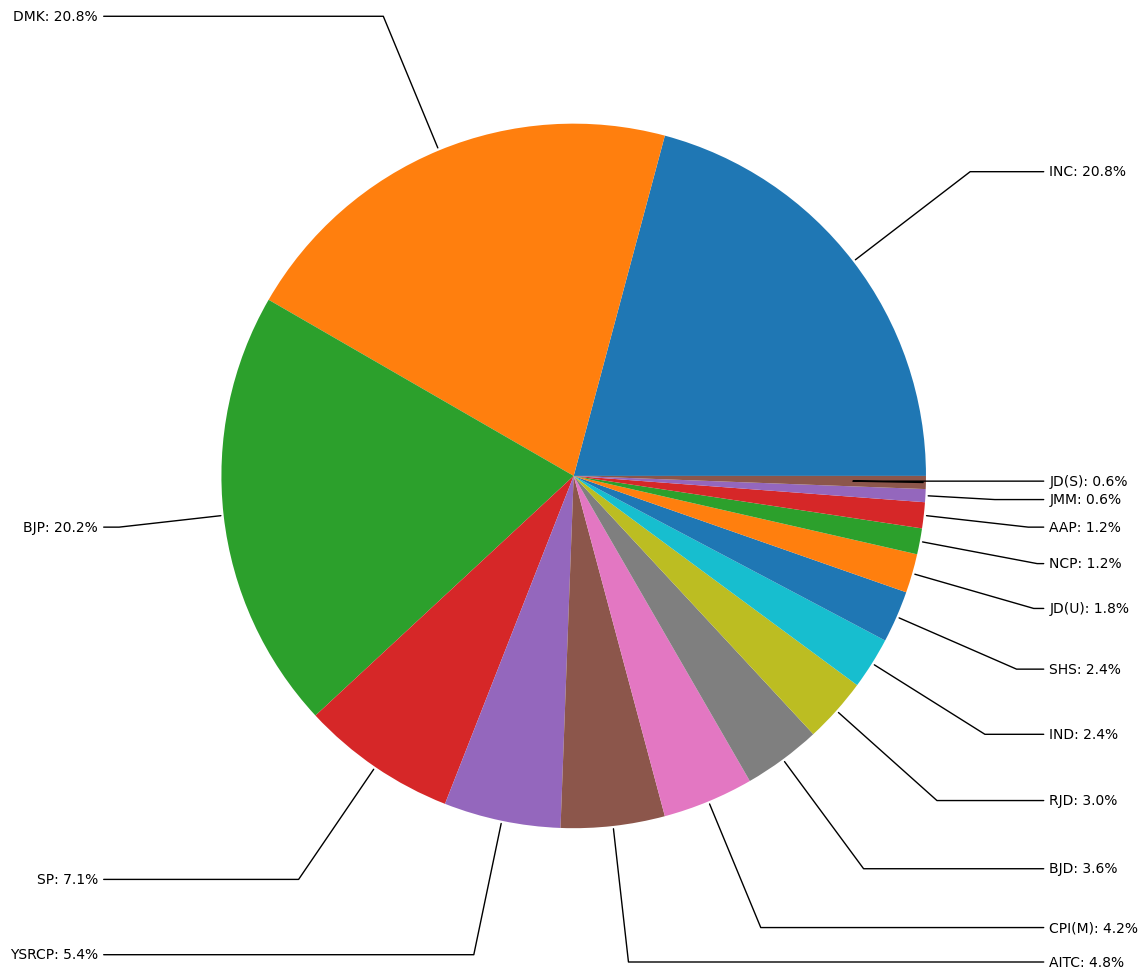

In [37]:
plt.figure(figsize=(10, 10))
party_counts = pd.value_counts(crime_parties)
patches, _ = plt.pie(party_counts)
percentages = 100.*party_counts/party_counts.sum()

# Showing Arrows
for i, (p, pc) in enumerate(zip(patches, percentages)):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    plt.annotate('{}: {:.1f}%'.format(party_counts.index[i], pc), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))


plt.axis('equal')
plt.show()

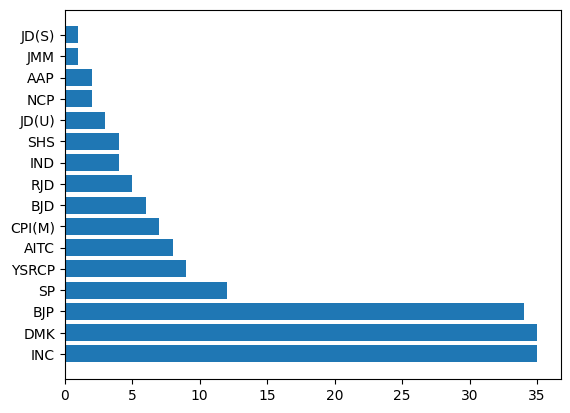

In [39]:
# Count the number of occurrences of each party
party_counts = pd.value_counts(crime_parties)

# Create horizontal bar chart
plt.barh(party_counts.index, party_counts)

# Show the chart
plt.show()

# Wealth distribution

In [40]:
wealth_df = data[data['Total Assets'] > 10000000]

wealth_parties = wealth_df['Party'].values
wealth_assets = wealth_df['Total Assets'].value_counts

print(wealth_parties)
print(wealth_assets)

['DMK' 'BJP' 'NPP' 'BJD' 'BJD' 'INC' 'BJD' 'BJP' 'BJP' 'BJP' 'BJP' 'INC'
 'BJP' 'BJP' 'DMK' 'BJP' 'INC' 'YSRCP' 'AAP' 'IND' 'SHS' 'INC' 'BJP'
 'AIADMK' 'INC' 'YSRCP' 'SP' 'BJP' 'BJP' 'TDP' 'SHS' 'BJP' 'INC' 'BJP'
 'INC' 'INC' 'AIADMK' 'YSRCP' 'DMK' 'BJP' 'BJP' 'INC' 'INC' 'BJP' 'BJP'
 'AITC' 'BJP' 'BJP' 'INC' 'BJP' 'BJP' 'BJP' 'INC' 'BJP' 'BJP' 'INC' 'NCP'
 'BJP' 'AAP' 'INC' 'IND' 'AAP' 'BJP' 'BJP' 'DMK' 'BJP' 'BJP' 'IND' 'INC'
 'BJP' 'TDP' 'BJP' 'INC' 'BJP' 'INC' 'BJP' 'BJP' 'BJP' 'BJP' 'DMK' 'SHS'
 'BJP' 'IND' 'YSRCP' 'BJP' 'INC' 'BJP' 'INC' 'INC' 'INC' 'BJP' 'BJP'
 'YSRCP' 'BJP' 'IND' 'BJP' 'INC' 'TDP' 'IND' 'JD(S)' 'INC' 'BJP' 'BJP'
 'BJP' 'INC' 'IND' 'RJD' 'INC' 'BJP' 'INC' 'BJP' 'BJP' 'DMK' 'BJP' 'BJP'
 'INC' 'INC' 'AITC' 'AITC' 'INC' 'BJP' 'NDPP' 'YSRCP' 'DMK' 'BJP' 'NCP'
 'BJP' 'INC' 'BJP' 'BJP' 'INC' 'BJP' 'INC' 'TDP' 'YSRCP' 'DMK' 'BJP' 'INC'
 'BJP' 'NPP' 'IND' 'DMK' 'INC' 'INC' 'BJP' 'INC' 'INC' 'BJP' 'AITC'
 'YSRCP' 'SP' 'INC' 'BJP' 'BJP' 'DMK' 'INC' 'AIADMK' 'INC' 'AIADMK'

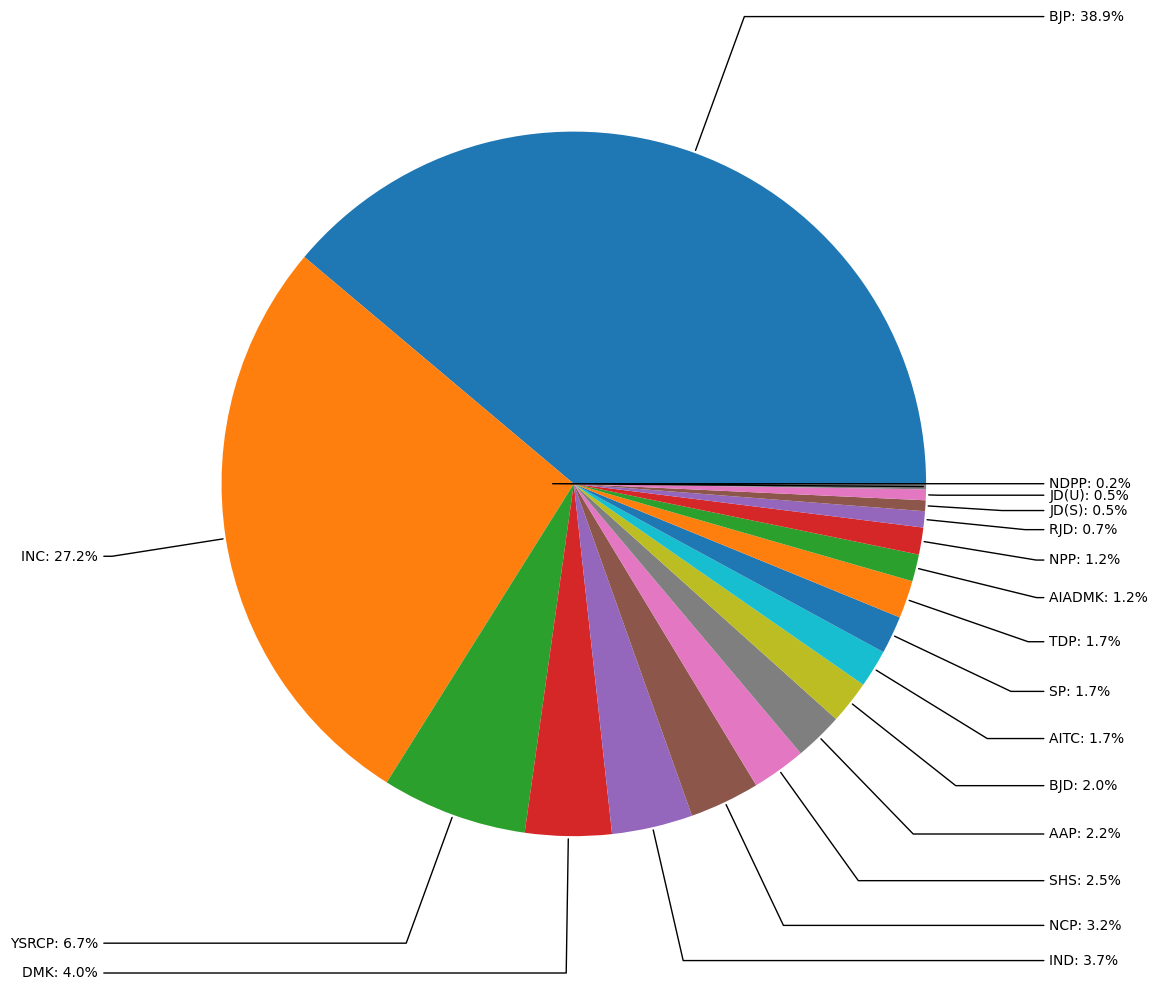

In [41]:
plt.figure(figsize=(10, 10))
party_counts = pd.value_counts(wealth_parties)
patches, _ = plt.pie(party_counts)
percentages = 100.*party_counts/party_counts.sum()

# Showing Arrows
for i, (p, pc) in enumerate(zip(patches, percentages)):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    plt.annotate('{}: {:.1f}%'.format(party_counts.index[i], pc), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))


plt.axis('equal')
plt.show()

# Education

In [42]:
print(data['Education'].unique())

['8th Pass' '12th Pass' 'Post Graduate' 'Graduate Professional' 'Graduate'
 '10th Pass' 'Others' 'Doctorate' 'Literate' '5th Pass']


In [50]:
education_df = data[(data['Education'] == 'Graduate') | (data['Education'] == 'Graduate Professional') | (data['Education'] == 'Doctorate') | (data['Education'] == 'Post Graduate')]

education_parties = education_df['Party'].values
education_info = education_df['Total Assets'].value_counts

print(education_parties)
print(education_info)

['INC' 'BJP' 'AITC' ... 'CPI' 'BJP' 'BJP']
<bound method IndexOpsMixin.value_counts of 2        7000000
3        9000000
5        3000000
6        2000000
7        9000000
          ...   
2052     1000000
2053     1900000
2054     6100000
2056    13000000
2058     1100000
Name: Total Assets, Length: 1354, dtype: int64>


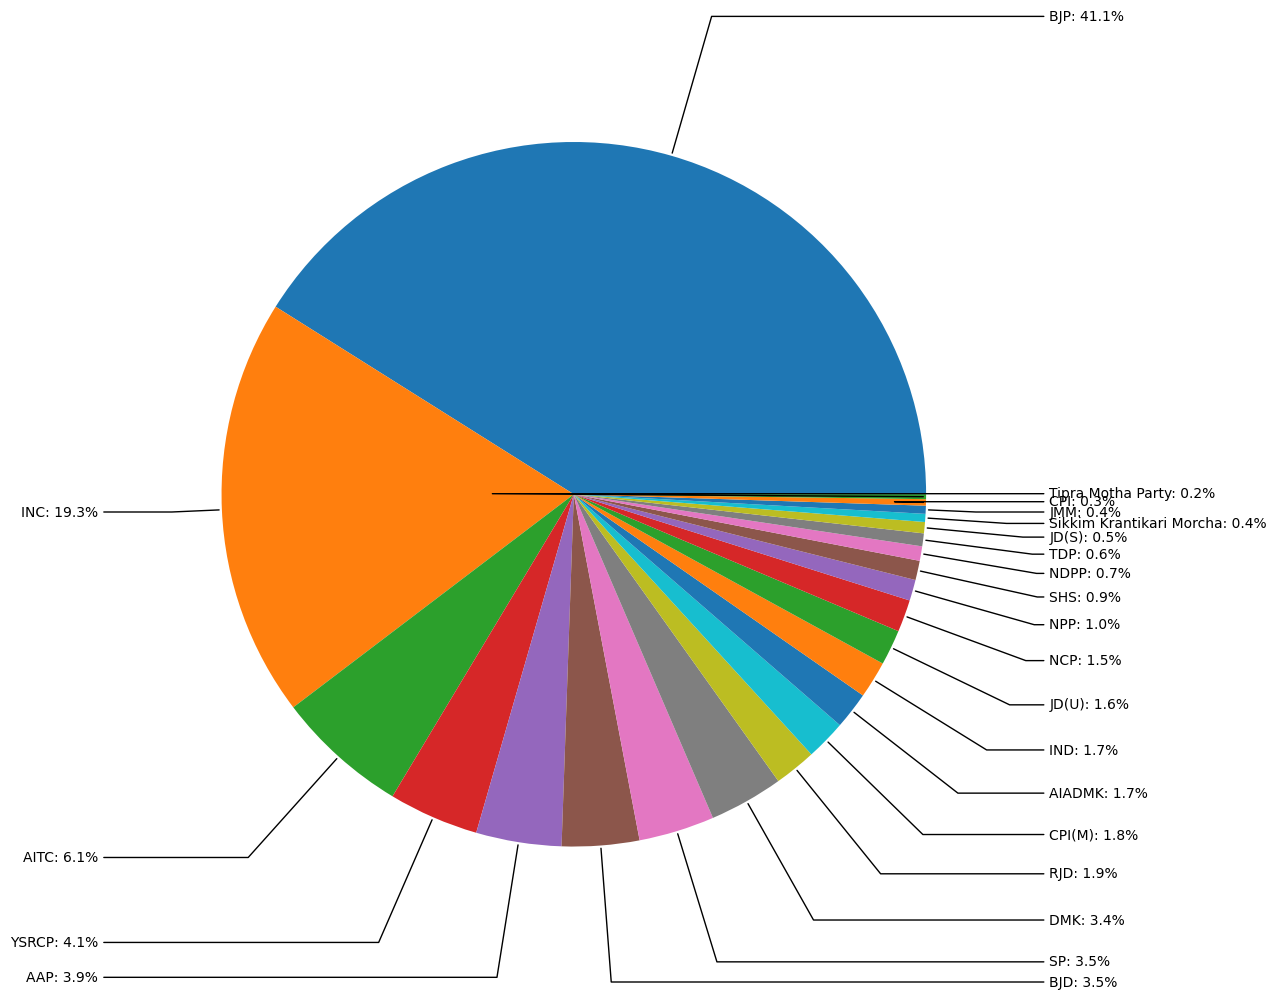

In [51]:
plt.figure(figsize=(10, 10))
party_counts = pd.value_counts(education_parties)
patches, _ = plt.pie(party_counts)
percentages = 100.*party_counts/party_counts.sum()

# Showing Arrows
for i, (p, pc) in enumerate(zip(patches, percentages)):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    plt.annotate('{}: {:.1f}%'.format(party_counts.index[i], pc), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle))


plt.axis('equal')
plt.show()